In [31]:
# This is a Python 3 script

In [5]:
# archive_dir = '/Volumes/SD-Mac/CDF_archive_v2/'
# archive_dir = '/Users/yaolun/data/CDF_archive_v2/'
archive_dir = '/home/bettyjo/yaolun/CDF_archive_v2/'

# Source Information

In [6]:
from astropy.io import ascii
# distance
# dist = ascii.read('/Users/yaolun/data/cops-spire_distance.txt')
dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

# source list
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [19.0, 44.4, 23.2, 3.3, 0.327,
              5.41, 0.89, 13.5, 6.13, 23.5,
              0.521, 2.33, 4.4, 3.81, 1.96,
              2.62, 0.792, 1.49, 2.26, 19.7,
              5.36, 2.29, 4.61, 8.78, 0.564,
              34.7]
t_bol_list = [51.3, 98.3, 105.0, 66.7, 63.5,
              41.8, 53.6, 51.1, 48.4, 109.0,
              129.0, 80.5, 55.8, 361.0, 126.0,
              158.0, 149.0, 41.6, 231.0, 129.0,
              33.1, 207.0, 115.0, 49.3, 45.4,
              597.0]
alpha500_list = [2.76, 2.82, 2.42, 2.13, 1.82,
                 2.28, 2.32, 2.58, 2.46, 2.72,
                 1.57, 1.74, 2.08, 2.05, 2.37,
                 2.27, 1.99, 2.45, 2.44, 2.65,
                 2.65, 2.39, 2.56, 2.52, 2.30,
                 2.06]
alpha500_err_list = [0.04, 0.05, 0.03, 0.02, 0.01,
                     0.02, 0.02, 0.01, 0.02, 0.007,
                     0.02, 0.03, 0.01, 0.02, 0.02,
                     0.01, 0.01, 0.01, 0.01, 0.05,
                     0.02, 0.02, 0.03, 0.01, 0.01,
                     0.03]
alpha_nir_list = [2.68, -999, 0.71, 1.50, 0.75,
                  0.79, 1.99, 1.95, 2.45, 1.43,
                  0.99, 1.71, 2.91, 0.14, 1.02,
                  -0.15, 0.55, 1.32, -999, 1.13,
                  -999, 2.49, 0.40, 2.05, 0.74,
                  -0.63]
alpha_nir_err_list = [1.19, -999, 0.03, 0.32, 0.24,
                      0.37, 0.54, 0.33, 0.75, 0.17,
                      0.23, 0.39, 1.45, 0.08, 0.33,
                      0.84, 0.04, 0.15, -999, 0.19,
                      -999, 0.48, 0.30, 1.12, 0.18,
                      0.24]

# Evolutionary Indicators - Submillimeter Luminosity

In [9]:
def lsubmm(low_wave, spec, dist):
    """
    spec = 'Wavelength(um)' and 'Flux_Density(Jy)'
    dist: distance in parsec
    """
    import sys
    sys.path.append('/Users/yaolun/programs/misc/hyperion/')
#     sys.path.append('/home/bettyjo/yaolun/programs/misc/hyperion/')
    from l_bol import l_bol
    
    l = l_bol(spec['Wavelength(um)'][spec['Wavelength(um)'] >= low_wave],
              spec['Flux_Density(Jy)'][spec['Wavelength(um)'] >= low_wave], dist)
    return l.data[0]

RCrA-IRS7B 0.150941157376 19.0 51.3 125.876867054
RCrA-IRS7C 0.152121038109 44.4 98.3 291.872843836
HH46 0.189732597922 23.2 105.0 122.277353781
L723-MM 0.0657261782949 3.3 66.7 50.2083049039
L1014 0.0241873519017 0.327 63.5 13.5194626236
L1157 0.106669579276 5.41 41.8 50.717365126
Ced110 0.0207226612071 0.89 53.6 42.9481518374
BHR71 0.161673190665 13.5 51.1 83.5017849559
IRAS03245 0.0512886566335 6.13 48.4 119.519605355
L1551-IRS5 0.0777980776847 23.5 109.0 302.064018795
L1455-IRS3 0.0458527342071 0.521 129.0 11.3624630899
B1-a 0.0934436647323 2.33 80.5 24.9348097239
B1-c 0.115691858541 4.4 55.8 38.0320625453
IRAS03301 0.0483955856362 3.81 361.0 78.7261885545
TMR1 0.0149406509961 1.96 126.0 131.185716105
TMC1A 0.0153518791321 2.62 158.0 170.663146671
TMC1 0.015393789212 0.792 149.0 51.4493208326
IRAS15398 0.0323112225541 1.49 41.6 46.1140087629
RNO91 0.0153221845801 2.26 231.0 147.498549452
GSS30-IRS1 0.0711790094257 19.7 129.0 276.766987331
VLA1623 0.151014904254 5.36 33.1 35.4931854

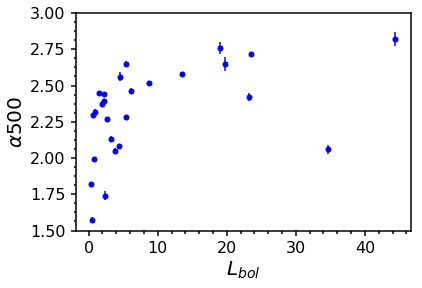

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

lsubmm_list = []
for o in obj_list:
    spec = ascii.read(archive_dir+o+'/spire/data/'+o+'_spire_corrected.txt')
    l = lsubmm(350, spec, dist['distance'][dist['object'] == o])
    lsubmm_list.append(l)
    print(o, l, l_bol_list[obj_list.index(o)], t_bol_list[obj_list.index(o)], l_bol_list[obj_list.index(o)]/l)

    ax.errorbar(l_bol_list[obj_list.index(o)], alpha500_list[obj_list.index(o)],
                yerr=alpha500_err_list[obj_list.index(o)], marker='o', color='b', markersize=5)
   
# ax.set_xlim([0,400])
ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$L_{bol}}$', fontsize=20)
ax.set_ylabel(r'$\alpha 500$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

# fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/alpha500_lbol.pdf', format='pdf', dpi=300, bbox_inches='tight')
fig.savefig('/Volumes/SD-Mac/Dropbox/cops-spire/figures/alpha500_lbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

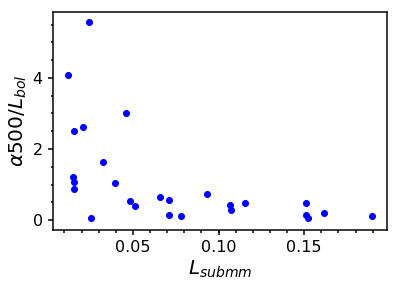

In [18]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
   
ax.errorbar(lsubmm_list,
            np.array(alpha500_list)/np.array(l_bol_list),
            yerr=alpha500_err_list, marker='o', color='b', linestyle='None')

# ax.set_xlim([0,400])
# ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$L_{submm}}$', fontsize=20)
ax.set_ylabel(r'$\alpha 500 / L_{bol}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

# fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/alpha500_lsmm.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Plot against BHR71 modeling results

In [8]:
from AlphaHyperion import AlphaHyperion
# aperture_list, alpha, alpha_err, lbol, lsmm
import numpy as np
from astropy.io import ascii

model_dir = '/home/bettyjo/yaolun/hyperion/bhr71/controlled/'
# age grid
model_range = np.arange(141,175)
aperfile = '/home/bettyjo/yaolun/bhr71/best_calibrated/aperture.txt'
model_list = ascii.read(model_dir+'model_list.txt')
dstar = 200.0
wave_center = 500.0

collection = {'age':[],'results':[]}

for i in model_range:
    result = AlphaHyperion(model_dir+'model'+str(i)+'/model'+str(i)+'.rtout',
                           aperfile, dstar, wave_center, lbollsmm=True)
    collection['results'].append(result)
    
    # get age from model list
    collection['age'].append(model_list['age'][model_list['Model#'] == 'Model'+str(i)].data)

/home/bettyjo/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(array([ 4000.]), 0.20312420168063)
(array([ 6000.]), 0.19938874095675177)
(array([ 8000.]), 0.19655240027301007)
(array([ 10000.]), 0.19362966338236914)
(array([ 12000.]), 0.18962806021115858)
(array([ 14000.]), 0.1888806170817523)
(array([ 16000.]), 0.18632607773547538)
(array([ 18000.]), 0.18155459601865953)
(array([ 20000.]), 0.17921531240964625)
(array([ 22000.]), 0.1770024427083198)
(array([ 24000.]), 0.17480910381247677)
(array([ 26000.]), 0.17054678568434739)
(array([ 28000.]), 0.16924829553584489)
(array([ 30000.]), 0.16542299802669386)
(array([ 32000.]), 0.1646927685167747)
(array([ 34000.]), 0.16180379876031115)
(array([ 36000.]), 0.15988106842017621)
(array([ 38000.]), 0.15615040805281905)
(array([ 40000.]), 0.15451078725832496)
(array([ 42000.]), 0.15233885297263908)
(array([ 44000.]), 0.14912523037971154)
(array([ 46000.]), 0.14667894223847597)
(array([ 48000.]), 0.14330918157925931)
(array([ 50000.]), 0.14263506154914787)
(array([ 55000.]), 0.13530489914624932)
(array([ 

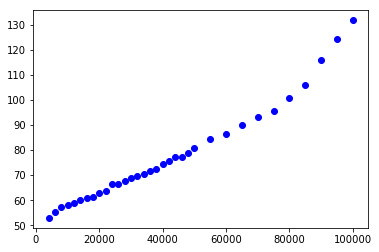

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.plot(collection['age'][i], collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
           'o', color='b')
    print(collection['age'][i],collection['results'][i][4][aper_ind])

(52.949216955650343, 2.9774002911504325)
(55.282837500055699, 2.9792001031454927)
(57.249256968324914, 2.978175063634751)
(58.140497891197597, 2.9763246173219198)
(58.987600670034105, 2.9735976627079159)
(59.95358621847938, 2.9707859626366231)
(60.994834820406503, 2.9694433579032551)
(61.301406150866178, 2.9638277014940857)
(63.058333407326337, 2.9668148756181449)
(63.72980184768155, 2.9635449356718859)
(66.293571601525073, 2.9646393366656953)
(66.586962575963724, 2.9646584649146295)
(67.523030429256124, 2.9629565599891099)
(68.799712844488411, 2.9636546691829331)
(69.753679413195215, 2.962963858879414)
(70.383390329541569, 2.9623870378450157)
(71.692916986861306, 2.9626077125235653)
(72.494578785834463, 2.9612905982571194)
(74.252105120594152, 2.9656681021953473)
(75.647369696989259, 2.9645387604440727)
(77.116724624317726, 2.9653093075789188)
(77.349221187055377, 2.9622500170602075)
(78.714962810840987, 2.9630800780549209)
(80.827465637081644, 2.9668270624834649)
(84.202618059707305,

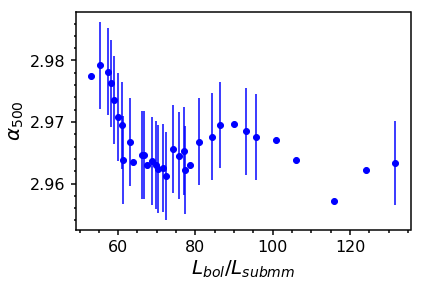

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.errorbar(collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
                collection['results'][i][1][aper_ind], yerr=collection['results'][i][2][aper_ind],
                marker='o', color='b')
    print(collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
          collection['results'][i][1][aper_ind])
# ax.plot(np.array(l_bol_list)/np.array(lsubmm_list), np.array(alpha500_list),'o')

ax.set_xlabel(r'$L_{bol}/L_{submm}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{500}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

In [22]:
# tstar grid
model_range = np.arange(85,88)
aperfile = '/home/bettyjo/yaolun/bhr71/best_calibrated/aperture.txt'
model_list = ascii.read(model_dir+'model_list.txt')
dstar = 200.0
wave_center = 500.0

collection = {'tstar':[],'results':[]}

for i in model_range:
    result = AlphaHyperion(model_dir+'model'+str(i)+'/model'+str(i)+'.rtout',
                           aperfile, dstar, wave_center, lbollsmm=True)
    collection['results'].append(result)
    
    # get age from model list
    collection['tstar'].append(model_list['tstar'][model_list['Model#'] == 'Model'+str(i)].data)

(array([ 6450.]), 2.980001240131668)
(array([ 6950.]), 2.9722652985659304)
(array([ 7450.]), 2.9704176733355507)


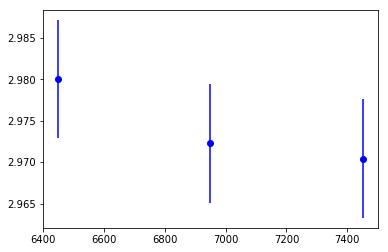

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.errorbar(collection['tstar'][i], collection['results'][i][1][aper_ind],
                yerr=collection['results'][i][2][aper_ind],
                marker='o', color='b', linestyle='None')
    print(collection['tstar'][i],collection['results'][i][1][aper_ind])

## Exercise on RJ-limit

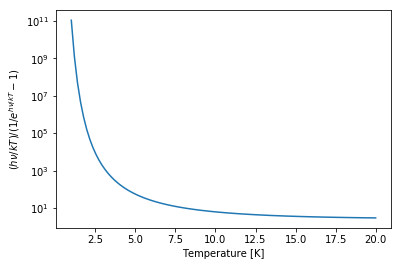

In [33]:
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
h = const.h.cgs.value
k = const.k_B.cgs.value
c = const.c.cgs.value

# T-range
T = np.linspace(1, 20, num=100)
nu = c/(500e-4)

plt.plot(T,k*T/h/nu/(1/np.exp(h*nu/k/T)))
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel(r'$(h\nu/kT) / (1/e^{h\nu /kT}-1)$')

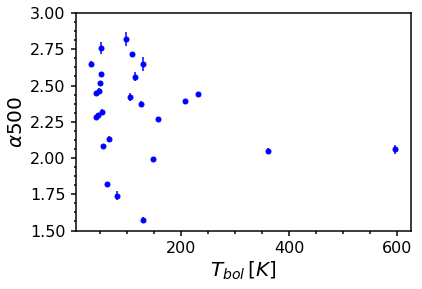

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(t_bol_list, alpha500_list, yerr=alpha500_err_list, marker='o', linestyle='None', color='b', markersize=5)
ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$T_{bol}\,[K]$', fontsize=20)
ax.set_ylabel(r'$\alpha 500$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/alpha500_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

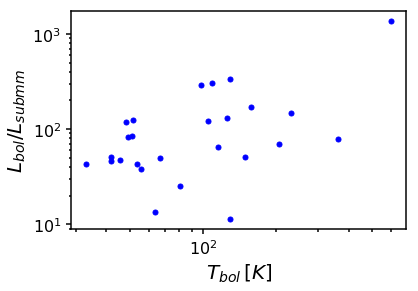

In [33]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_bol_list, np.array(l_bol_list)/np.array(lsubmm_list), marker='o', linestyle='None', color='b', markersize=5)

ax.set_xlabel(r'$T_{bol}\,[K]$', fontsize=20)
ax.set_ylabel(r'$L_{bol}/L_{submm}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

ax.set_xscale('log')
ax.set_yscale('log')

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/lsmm_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Alpha at 500 um

In [6]:
# alpha500_list = []
for o in obj_list:
#     alpha500_list.append(ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])
    print(o, ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])

RCrA-IRS7B 2.767245
RCrA-IRS7C 2.812113
HH46 2.432405
L723-MM 2.155815
L1014 1.854385
L1157 2.273077
Ced110 2.340313
BHR71 2.589369
IRAS03245 2.472901
L1551-IRS5 2.736309
L1455-IRS3 1.54925
B1-a 1.743049
B1-c 2.084786
IRAS03301 2.067377
TMR1 2.386842
TMC1A 2.28547
TMC1 2.004424
IRAS15398 2.437274
RNO91 2.456058
GSS30-IRS1 2.66792
VLA1623 2.660031
WL12 2.409173
RCrA-IRS5A 2.56084
L483 2.529062
B335 2.297253
DKCha 2.077604


## $\alpha_{NIR}$

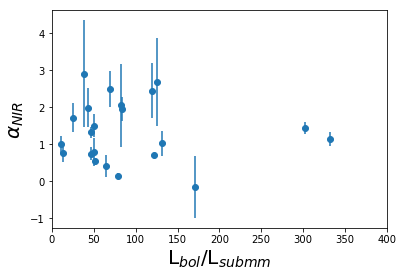

In [34]:
# Alpha NIR vs L_bol/L_submm
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(l_bol_list)[selector]/np.array(lsubmm_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlim([0,400])
ax.set_xlabel(r'L$_{bol}$/L$_{submm}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

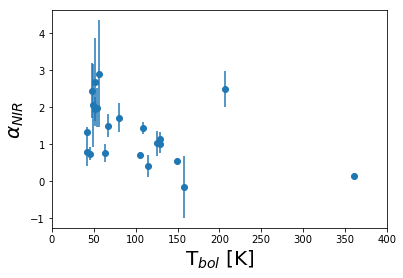

In [36]:
# Alpha NIR vs T_bol
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(t_bol_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlim([0,400])
ax.set_xlabel(r'T$_{bol}$ [K]', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

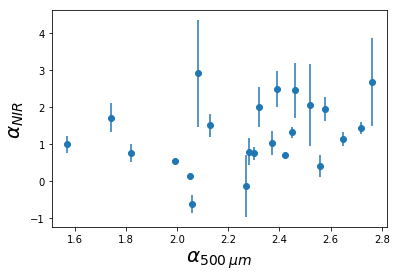

In [35]:
# Alpha NIR vs Alpha 500 um
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(alpha500_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlabel(r'$\alpha_{500\,\mu m}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

## Line detection statistics

In [64]:
%matplotlib inline
import os
from astropy.io import ascii
import numpy as np

data = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
total_obj = list(set(data['Object']))
# print(set(data['Object']), len(list(set(data['Object']))))

print(total_obj, len(total_obj))

def DetectionInSource(species, data):
    
    # get the index of the line list for the given species
    selector = np.zeros_like(data['Line'], dtype=bool)
    for i in range(len(data['Line'])):
        if species in data['Line'][i]:
            selector[i] = True
            
    # if species == 'CO', check further to exclude 13CO
    if species == 'CO':
        for i in range(len(data['Line'])):
            if '13CO' in data['Line'][i]:
                selector[i] = False
    
    obj_detection = list(set(data['Object'][selector]))
    
    return obj_detection

species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1) 
# positiver = (data['Str(W/cm2)'] >= 0)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

(['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'RNO91', 'BHR71', 'GSS30-IRS1', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'], 27)
('CO', ['L1014'])
('13CO', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('HCO+', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('H2O', ['Ced110', 'HH46', 'RNO91'])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['IRAS03245', 'L1455-IRS3', 'WL12', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', '

In [65]:
# only count lines with positive fluxes
species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

('CO', ['L1014'])
('13CO', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('HCO+', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('H2O', ['Ced110', 'HH46', 'RNO91'])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['IRAS03245', 'L1455-IRS3', 'WL12', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-c'])
('OI', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('CI', ['L1157', 'B335', 'BHR71'])
('CII', ['IRAS03245', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'VLA1623', '

In [79]:
species_list = ['CO4-3','CO5-4','CO6-5','CO7-6','CO8-7','CO9-8','CO10-9','CO11-10','CO12-11','CO13-12','CO14-13']
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter & ]))])

SyntaxError: invalid syntax (<ipython-input-79-cc2cac0f0281>, line 3)

In [61]:
species_list = ['13CO5-4','13CO6-5','13CO7-6','13CO8-7','13CO9-8','13CO10-9','13CO11-10',
                '13CO12-11','13CO13-12']
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])
    
print('Line found in the following sources')
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('13CO5-4', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('13CO6-5', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO7-6', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO8-7', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO9-8', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71

In [58]:
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('13CO5-4', ['WL12', 'HH100', 'Ced110', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1', 'L1551-IRS5'])
('13CO6-5', ['WL12', 'HH100', 'Ced110', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO7-6', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO8-7', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO9-8', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO10-9', ['VLA1623', 'GSS30-IRS1'])
('13CO11-10', [])
('13CO12-11', [])
('13CO13-12', [])


In [67]:
# show sources with detections
species_list = ['HCO+6-5','HCO+7-6','HCO+8-7','HCO+9-8','HCO+10-9','HCO+11-10','HCO+12-11','HCO+13-12','HCO+14-13',
                'HCO+15-14','HCO+16-15']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('HCO+6-5', ['HH100', 'RCrA-IRS7B', 'RCrA-IRS7C'])
('HCO+7-6', ['HH100', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('HCO+8-7', ['HH100', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C'])
('HCO+9-8', [])
('HCO+10-9', ['HH100'])
('HCO+11-10', [])
('HCO+12-11', [])
('HCO+13-12', [])
('HCO+14-13', [])
('HCO+15-14', [])
('HCO+16-15', [])


## detail water line detection stats

In [73]:
species_list =  ['H2O','p-H2O1_11-0_00','p-H2O2_11-2_02','o-H2O1_10-1_01','o-H2O3_12-2_21','o-H2O3_12-3_03','p-H2O2_02-1_11']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('H2O', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'VLA1623', 'B335', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('p-H2O1_11-0_00', ['HH100', 'L1157', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'L483', 'B1-a', 'B1-c'])
('p-H2O2_11-2_02', ['BHR71', 'B1-c'])
('o-H2O1_10-1_01', ['L1157', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'B1-c'])
('o-H2O3_12-2_21', ['DKCha', 'HH100', 'L1157', 'VLA1623', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'TMR1', 'B1-a', 'B1-c'])
('o-H2O3_12-3_03', ['L1157', 'BHR71', 'B1-c'])
('p-H2O2_02-1_11', ['DKCha', 'L723-MM', 'L1157', 'B335', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'TMR1', 'B1-c'])


## Use SNR >= 3 cut

In [62]:
species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 3) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

('CO', [])
('13CO', ['L1157', 'L483', 'B1-c'])
('HCO+', ['IRAS03245', 'WL12', 'DKCha', 'VLA1623', 'BHR71', 'B1-a'])
('H2O', [])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['L1455-IRS3', 'L723-MM', 'L1014', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'TMR1', 'B1-c'])
('OI', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('CI', [])
('CII', ['IRAS03245', 'L1455-IRS3', 'L723-MM', 'HH100', 'L1157', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'TMR1'])


In [ ]:
           NII_205
   

## Number of lines found in 1D SPIRE spectra

In [75]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] == 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

323
25


## Number of lines found in SPIRE cube spectra

In [76]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] != 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

3068
27


# CO optical depth analysis

In [7]:
# compare the ratio of the line fluxes between 12CO and 13CO with the abundance ratio of 12C to 13C

# get the source that both 12Co and 13CO are detected at the same J transition
from astropy.io import ascii
import numpy as np
fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')

# get only 1D spectra
fitting = fitting[fitting['Pixel_No.'] == 'c']

# possible J transitions for 13CO lines
J_up = np.array([5,6,7,8,9,10])

# select sources
selected = {'Object':[], 'J_up':[], '12CO/13CO':[], 'unc':[]}
selector = (fitting['SNR'] >= 5.0) & (fitting['Validity'] == 1)
for o in list(set(fitting['Object'])):
    for j in J_up:
        co12 = fitting[(fitting['Line'] == 'CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & selector]
        co13 = fitting[(fitting['Line'] == '13CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & selector]
        if len(co12)+len(co13) == 2:
            print(o,j)
            selected['Object'].append(o)
            selected['J_up'].append(j)
            selected['12CO/13CO'].append(co12['Str(W/cm2)'].data[0]/co13['Str(W/cm2)'].data[0])
            comb_noise = ((1/co12['SNR'].data[0])**2+(1/co13['SNR'].data[0])**2)**0.5*\
                                       (co12['Str(W/cm2)'].data[0]/co13['Str(W/cm2)'].data[0])
            selected['unc'].append(comb_noise)
        else:
            selected['Object'].append(o)
            selected['J_up'].append(j)
            selected['12CO/13CO'].append(np.nan)
            selected['unc'].append(np.nan)
for k in selected.keys():
    selected[k] = np.array(selected[k])

('WL12', 5)
('WL12', 6)
('Ced110', 5)
('Ced110', 6)
('VLA1623', 5)
('VLA1623', 6)
('RCrA-IRS5A', 5)
('RCrA-IRS5A', 6)
('RCrA-IRS7B', 5)
('RCrA-IRS7B', 6)
('RCrA-IRS7B', 7)
('RCrA-IRS7B', 8)
('RCrA-IRS7B', 9)
('RCrA-IRS7C', 5)
('RCrA-IRS7C', 6)
('RCrA-IRS7C', 7)
('RCrA-IRS7C', 8)
('RCrA-IRS7C', 9)
('GSS30-IRS1', 5)
('GSS30-IRS1', 6)
('GSS30-IRS1', 7)
('L1551-IRS5', 5)


In [84]:
co12_Eu = np.array([55.32, 82.97, 116.16, 154.87, 199.11, 248.88])
co13_Eu = np.array([52.89, 79.33, 111.05, 148.06, 190.36, 237.93])

array([ 3.67240949,  4.97966701,  9.49567496,         nan,         nan,
               nan])

/home/bettyjo/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 156 but corresponding boolean dimension is 6


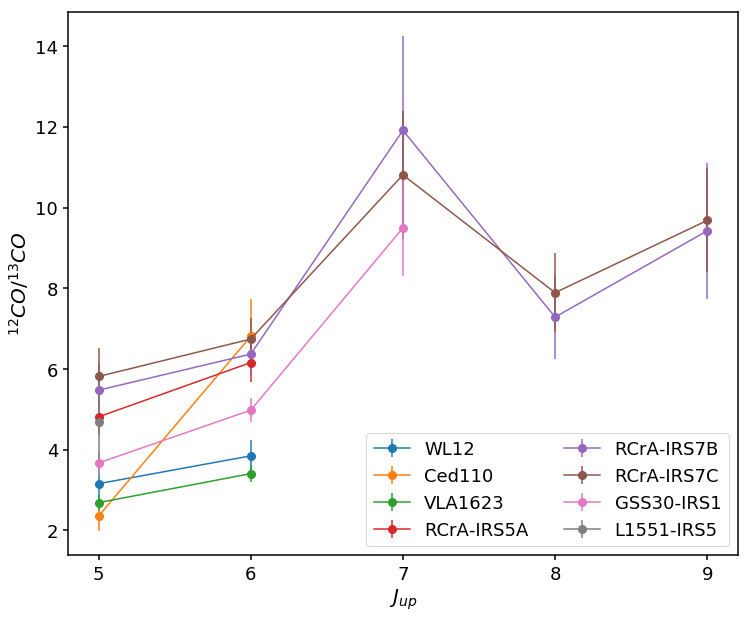

In [24]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for o in list(set(selected['Object'])):
    selector = (selected['Object'] == o)
    if len(selected['J_up'][(np.isnan(selected['12CO/13CO'][selector]) == False)]) == 0:
        continue
    ax.errorbar(selected['J_up'][selector],
                selected['12CO/13CO'][selector],
                yerr=selected['unc'][selector],
                marker='o', label=o, markersize=8)

ax.legend(fontsize=18, loc='best', ncol=2)

ax.set_xlabel(r'$J_{up}$', fontsize=20)
ax.set_ylabel(r'$^{12}CO/^{13}CO$', fontsize=20)
ax.set_xticks([5,6,7,8,9])
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

fig.savefig('/home/bettyjo/yaolun/test/co_optical_depth_str.pdf',format='pdf',dpi=300,bbox_inches='tight')
